In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
test_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [7]:
train_data.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [8]:
d1 = train_data.copy()
d2 = test_data.copy()

In [9]:
train_data.duplicated().sum()

0

In [10]:
test_data.duplicated().sum()

0

In [11]:
train_data.shape

(165034, 14)

In [12]:
test_data.shape

(110023, 13)

Text(0.5, 1.0, 'How Excited Over Geography')

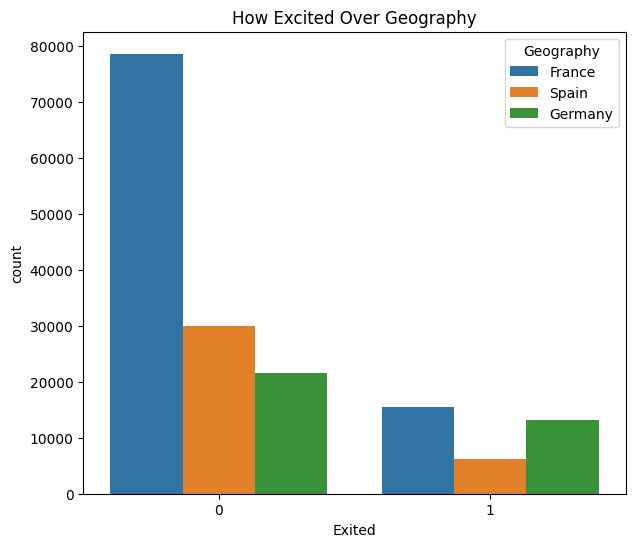

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(x='Exited',data=train_data,hue='Geography')
plt.title('How Excited Over Geography')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
le

LabelEncoder()

In [17]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = le.fit_transform(train_data[col])

In [18]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [19]:
x=train_data.drop(['CustomerId','Surname','Exited'],axis=1)

In [20]:
x.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [21]:
y = train_data[['Exited']]
y.shape

(165034, 1)

In [22]:
y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [23]:
test_data = test_data.drop(['CustomerId', 'Surname'],axis=1)
test_data

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [24]:
from sklearn.preprocessing import MinMaxScaler  #最大最小值归一化 原始值-最小值/最大值减去最小值，目的是归到[0-1]使得差异变小



In [25]:
mn = MinMaxScaler()
x.columns

Index(['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [26]:
x.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [29]:
x['EstimatedSalary']=mn.fit_transform(x[['EstimatedSalary']])
x.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,668,0,1,33.0,3,0.00,2,1.0,0.0,0.907279
1,1,627,0,1,33.0,1,0.00,2,1.0,1.0,0.247483
2,2,678,0,1,40.0,10,0.00,2,1.0,0.0,0.924364
3,3,581,0,1,34.0,2,148882.54,1,1.0,1.0,0.422787
4,4,716,2,1,33.0,5,0.00,2,1.0,1.0,0.075293


In [31]:
test_data['EstimatedSalary']=mn.fit_transform(test_data[['EstimatedSalary']])
test_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,0.804903
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,0.362723
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,0.694419
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,0.569654
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,0.697164


In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [33]:
import lightgbm as lgb

In [35]:
lg = lgb.LGBMClassifier(
    objective='binary',
    random_state=890,
    learning_rate=0.11440,
    metric = ['auc', 'accuracy'],
    colsample_bytree = 0.95,
    num_leaves = 32
)

In [36]:
lg.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 26300, number of negative: 97475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 123775, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212482 -> initscore=-1.310027
[LightGBM] [Info] Start training from score -1.310027


LGBMClassifier(colsample_bytree=0.95, learning_rate=0.1144,
               metric=['auc', 'accuracy'], num_leaves=32, objective='binary',
               random_state=890)

In [37]:
prediction = lg.predict(xtest)

In [38]:
prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy of LGBMClassifier", accuracy_score(y_test,prediction))

Accuracy of LGBMClassifier 0.8670835454082746


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32638
           1       0.74      0.56      0.64      8621

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



<Axes: >

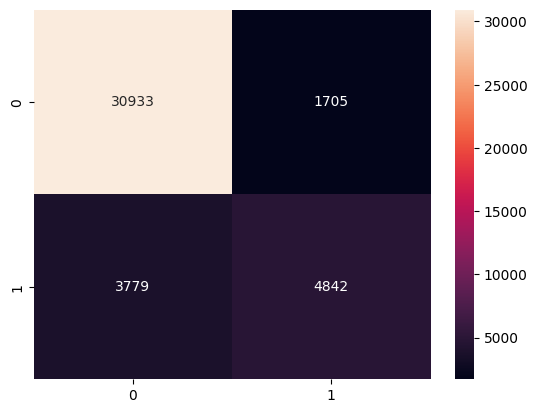

In [43]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt='d')

In [44]:
f1_score(y_test,prediction)

0.6384493670886076

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
predict_lr=lr.predict(xtest)

In [49]:
predict_lr=lr.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression", accuracy_score(y_test,predict_lr))

Accuracy of Logistic Regression 0.7895974211687147
